In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.patches as mpatches

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), 'results')

In [3]:
RP = [1000, 10000]
op = 1.01
ip = 0.25
dam = 1

In [4]:
prod_results = pd.DataFrame()
for i in range(len(RP)):
    rp = RP[i]
    filename = f'prod_df_{op}_{ip}_mosek_{rp}_{dam}.xlsx'
    filepath = os.path.join(path, filename)
    prod = pd.read_excel(filepath, index_col = [0])
    prod['wo_ci'] = (1 - prod['wo_ci'])*100
    prod['wi_ci'] = (1 - prod['wi_ci'])*100
    prod_results['sector'] =  prod['sector']
    prod_results[f'wo_ci_{rp}'] = prod['wo_ci']
    prod_results[f'wi_ci_{rp}'] = prod['wi_ci']

In [5]:
prod_results

,sector,wo_ci_1000,wi_ci_1000,wo_ci_10000,wi_ci_10000
0,C10T12,3.468614,4.712896,13.250212,17.161355
1,C16,11.746607,13.377827,15.566180,18.140685
2,C17,11.763724,13.223448,16.953352,17.396322
3,C19,2.450278,3.206086,8.211833,10.352470
4,C20,2.486660,2.831239,8.199299,10.078431
5,C22,16.270914,18.272903,21.194567,23.618850
6,C24,9.740261,14.029809,13.207441,18.616071
7,C26,4.788698,7.577111,10.664241,13.859579
8,C25,9.740261,14.029809,13.207441,18.616071


In [6]:
for i in range(len(RP)):
    rp = RP[i]
    prod_results[f'%inc_{rp}'] = ((prod_results[f'wi_ci_{rp}'] - prod_results[f'wo_ci_{rp}']) / prod_results[f'wo_ci_{rp}'])*100
    

In [7]:
def production_shock_plotter(df, ax):
    x_pos = np.arange(len(df))
    width = 0.3
    colors = ['#b0c4b1', '#1d3557']
    hatches = ['//', '//']

    for i in range(len(RP)):
        rp = RP[i]
        wo_ci_col = f'wo_ci_{rp}'
        wi_ci_col = f'wi_ci_{rp}'
        
        # Position for each bar in group
        bar_positions = x_pos + i * width
        
        # Bar heights
        wo_heights = df[wo_ci_col]
        diff_heights = df[wi_ci_col] - df[wo_ci_col]
        total_heights = df[wi_ci_col]
    
        # Plot bars
        bars1 = ax.bar(bar_positions, wo_heights, width, color=colors[i])
        bars2 = ax.bar(bar_positions, diff_heights, width, bottom=wo_heights, color=colors[i], hatch=hatches[i], alpha=0.5)
    
        
        # Add annotations
        for j, pos in enumerate(bar_positions):
            label_col = f'%inc_{rp}'  
            label_value = df[label_col].iloc[j]
            ax.text(pos, total_heights.iloc[j] + 0.5,  # 1 unit above bar
                    f'{label_value:.0f}%', ha='center', va='bottom', fontsize=8, fontname='Calibri', color='red')
    
    legend_elements = [
        mpatches.Patch(facecolor=colors[0], label='RP-1000'),  # Solid color for RP1000
        mpatches.Patch(facecolor=colors[1], label='RP-10000'), # Solid color for RP10000
        mpatches.Patch(facecolor='white', hatch='//', edgecolor='black', label='Additional shock due to CI disruption')  # Hatch only
    ]
    
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1),
              ncol=3, frameon=False, fontsize=10, prop={'family': 'Calibri'})
    
    
    # Center x-ticks between grouped bars
    group_centers = x_pos + width / 2
    ax.set_xticks(group_centers)
    ax.set_xticklabels(df['sector'], rotation=0, ha='center', fontname='Calibri', fontsize=10)
    
    # Y-axis formatting
    ax.set_yticks(np.arange(0, 35, 5))
    ax.set_yticklabels(np.arange(0, 35, 5), fontname='Calibri', fontsize=10)
    ax.set_ylabel("Production shock (%)", fontname='Calibri', fontsize=10)
    ax.set_xlabel("Sector", fontname='Calibri', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('productionshock.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

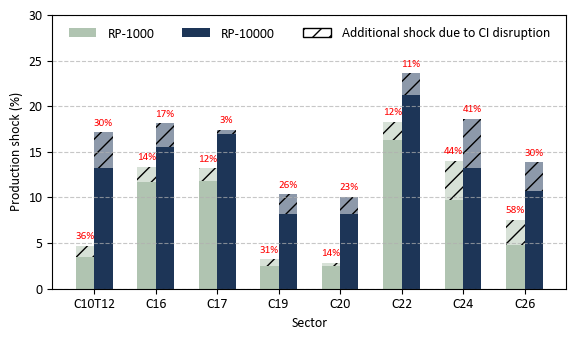

In [8]:
fig, ax = plt.subplots(figsize=(6, 3.5))
df = pd.DataFrame(prod_results.head(8))
production_shock_plotter(df, ax)

In [9]:
prod_results

,sector,wo_ci_1000,wi_ci_1000,wo_ci_10000,wi_ci_10000,%inc_1000,%inc_10000
0,C10T12,3.468614,4.712896,13.250212,17.161355,35.872587,29.517583
1,C16,11.746607,13.377827,15.566180,18.140685,13.886738,16.539091
2,C17,11.763724,13.223448,16.953352,17.396322,12.408691,2.612873
3,C19,2.450278,3.206086,8.211833,10.352470,30.845795,26.067708
4,C20,2.486660,2.831239,8.199299,10.078431,13.857136,22.918197
5,C22,16.270914,18.272903,21.194567,23.618850,12.304091,11.438228
6,C24,9.740261,14.029809,13.207441,18.616071,44.039359,40.951382
7,C26,4.788698,7.577111,10.664241,13.859579,58.229050,29.963114
8,C25,9.740261,14.029809,13.207441,18.616071,44.039359,40.951382
